# 本报告需要解决的问题：
1. 分析研究titanic数据中哪些字段因素影响生存率
2. 分析影响生存率字段对生存率影响的相关关系，并且给出可视化的图表来表示这种影响。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1数据读取与清理

### 1.1数据读取

In [3]:
titanic_data=pd.read_csv('titanic-data.csv')


### 1.2数据清理

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


在上述数据中，age字段有缺失，Embarked字段有缺失，下面的分析所需要的字段包括Survivied,Pclass,Sex,Age,Sibsp,Fare,Embarked字段，可以删除不需要的字段,并且删除其中为Nan的字段,并且删除其中票价为0的行

In [5]:
titanic_data.drop(['PassengerId','Name','Parch','Ticket','Cabin'],axis=1, inplace=True)
titanic_data.dropna(axis=0,how='any',inplace=True)
titanic_data=titanic_data[titanic_data.Fare!=0]

## 2数据分析

### 2.1 年龄和生存率之间的关系

In [6]:
titanic_survival_age=titanic_data[titanic_data.Survived==1]['Age']
titanic_survival_age.describe()

count    287.000000
mean      28.204425
std       14.883899
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

 分析年龄1d数据得出：幸存者的数量为288，年龄均值为28.19岁，标准差为14.85岁，最小的年纪为0.42岁，最大的年纪为80岁，中位数为28岁

In [7]:
titanic_victim_age=titanic_data[titanic_data.Survived==0]['Age']
titanic_victim_age.describe()

count    418.000000
mean      30.537081
std       14.213318
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

分析遇难者的年龄结果为：年龄均值为30.6岁，标准差为14,17岁，最小年龄为1岁，最大年龄为74岁

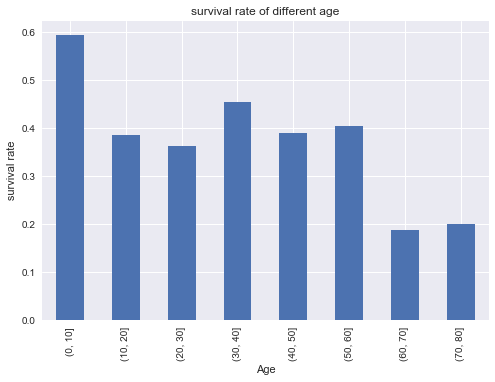

In [8]:
bins=[0,10,20,30,40,50,60,70,80]
cuts=pd.cut(titanic_data['Age'],bins)
age_cut=pd.DataFrame({"Survived":titanic_data['Survived'],"Age":cuts})
age_cut_data=age_cut.groupby('Age').mean()['Survived']
plt.title("survival rate of different age")
plt.ylabel("survival rate")
age_cut_data.plot(kind='bar')
plt.show()

从上述不同年龄段存活率图可以看出，在上图中，年龄在0-10岁的人存活率最高。

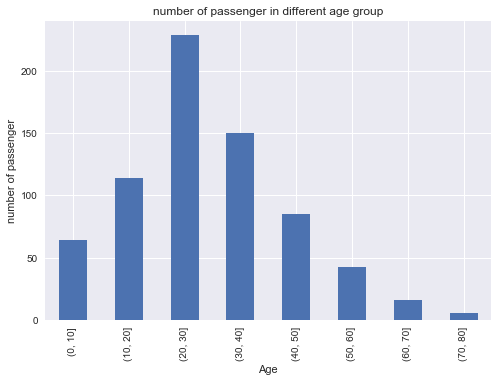

In [9]:
bins=[0,10,20,30,40,50,60,70,80]
cuts=pd.cut(titanic_data['Age'],bins)
age_cut=pd.DataFrame({"Survived":titanic_data['Survived'],"Age":cuts})
age_cut_num=age_cut.groupby('Age').count()['Survived']
plt.title("number of passenger in different age group")
plt.ylabel("number of passenger")
age_cut_num.plot(kind='bar')
plt.show()

从图上可以看出，在所有的年龄断种，20-30岁的乘客数量最多

In [10]:
age_survival=pd.DataFrame({"Survived":titanic_data['Survived'],"Age":titanic_data['Age']})
age_survival.corr()

,Age,Survived
Age,1.000000,-0.078956
Survived,-0.078956,1.000000


从上图可以看出，年龄字段和生存率字段的自相关系数为-0.082446,年龄和生存率负相关，但是相关性不高

### 2.2 性别和生存率之间的关系

Sex
female    0.752896
male      0.206278
Name: Survived, dtype: float64


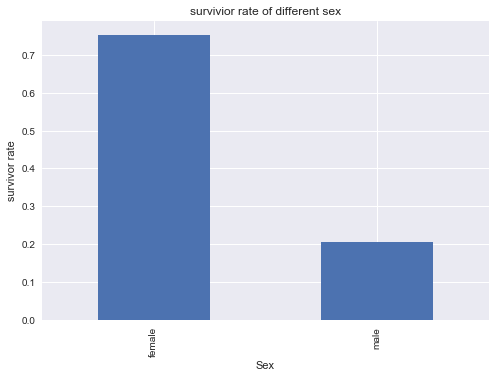

In [11]:
sex_survival=titanic_data.groupby('Sex').mean()['Survived']

plt.title("survivior rate of different sex")
plt.ylabel("survivor rate")
sex_survival.plot(kind="bar")
plt.show()



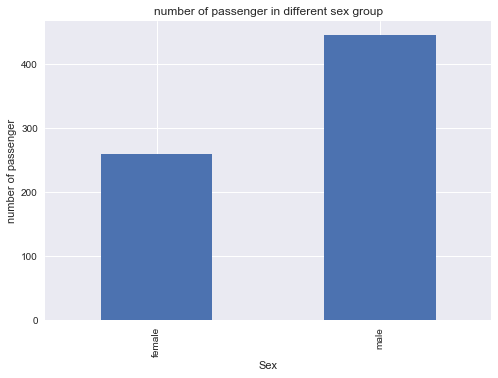

In [12]:
sex_cut_num=titanic_data.groupby('Sex').count()['Survived']
plt.title("number of passenger in different sex group")
plt.ylabel("number of passenger")
sex_cut_num.plot(kind='bar')
plt.show()

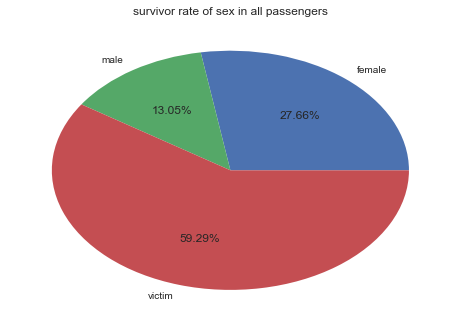

In [13]:
sex_survival_ration=titanic_data[titanic_data.Survived==1].groupby('Sex').count()['Survived']/len(titanic_data)
data_2=[]
data_2.append(sex_survival_ration[0])
data_2.append(sex_survival_ration[1])
data_2.append(1-sex_survival_ration[0]-sex_survival_ration[1])
plt.title("survivor rate of sex in all passengers")
labels=["female","male","victim"]
plt.pie(data_2,labels=labels,autopct='%1.2f%%')
plt.show()

从上图可以看出，在生存的总人数中，女性的生存率较高，为乘客总数的27.66%，男性生存率为总人数的13.05%。

### 2.3船舱等级和生存率之间的关系 

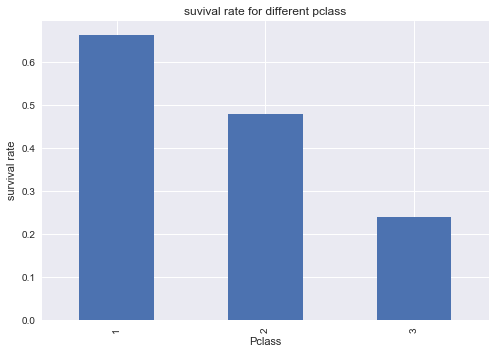

In [14]:
pclass_survival=titanic_data.groupby('Pclass').mean()['Survived']

plt.title("suvival rate for different pclass")
plt.ylabel("survival rate")
pclass_survival.plot(kind='bar')
plt.show()

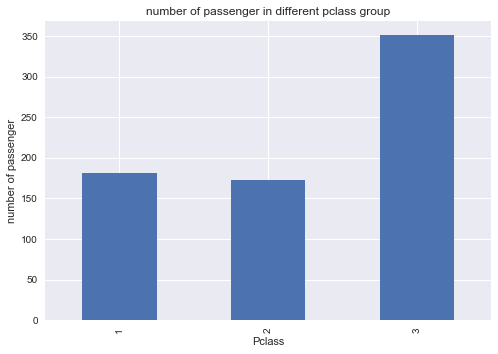

In [15]:
pclass_cut_num = titanic_data.groupby('Pclass').count()['Survived']
plt.title("number of passenger in different pclass group")
plt.ylabel("number of passenger")
pclass_cut_num.plot(kind='bar')
plt.show()

从上图可以看出，1等舱的生存率最高，其次为2等舱，最后为3等舱

In [16]:
pclass_survival=pd.DataFrame({"Survived":titanic_data['Survived'],"Pclass":titanic_data['Pclass']})
pclass_survival.corr()

,Pclass,Survived
Pclass,1.000000,-0.363966
Survived,-0.363966,1.000000


从上表可以看出仓位和生存率之间的相关系数为-0.35，为负相关，相关系数较高

## 2.4亲属数量和生存率之间的关系

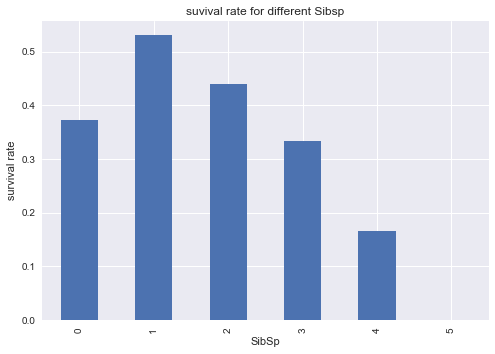

In [17]:
sibsp_survival=titanic_data.groupby('SibSp').mean()['Survived']
plt.title("suvival rate for different Sibsp")
plt.ylabel("survival rate")
sibsp_survival.plot(kind='bar')
plt.show()

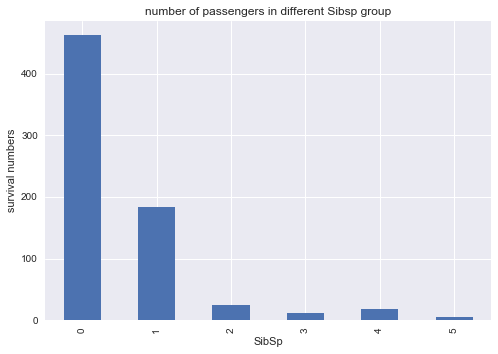

In [18]:
sibsp_survival_num=titanic_data.groupby('SibSp').count()['Survived']
plt.title("number of passengers in different Sibsp group")
plt.ylabel("survival numbers")
sibsp_survival_num.plot(kind='bar')
plt.show()

上图可以看出具有一个亲属的人生存率最高,而没有亲属的生存数量最多

In [19]:
slibsp_survival=pd.DataFrame({"Survived":titanic_data['Survived'],"SibSp":titanic_data['SibSp']})
slibsp_survival.corr()

,SibSp,Survived
SibSp,1.000000,-0.018549
Survived,-0.018549,1.000000


生存率和亲属之间的呈现负相关，相关系数较低

## 2.5船票价格和生存率之间的关系

In [20]:
titanic_survival_fare=titanic_data[titanic_data.Survived==1]['Fare']
titanic_survival_fare.describe()

count    287.000000
mean      51.827629
std       70.721791
min        6.975000
25%       13.000000
50%       26.250000
75%       65.000000
max      512.329200
Name: Fare, dtype: float64

In [21]:
titanic_survival_fare=titanic_data[titanic_data.Survived==0]['Fare']
titanic_survival_fare.describe()

count    418.000000
mean      23.295104
std       31.552522
min        4.012500
25%        7.895800
50%       12.700000
75%       26.550000
max      263.000000
Name: Fare, dtype: float64

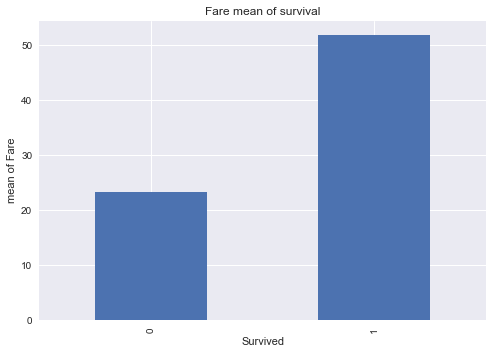

In [22]:
fare_survival=titanic_data.groupby('Survived').mean()['Fare']
plt.title("Fare mean of survival")
plt.ylabel("mean of Fare")
fare_survival.plot(kind='bar')
plt.show()

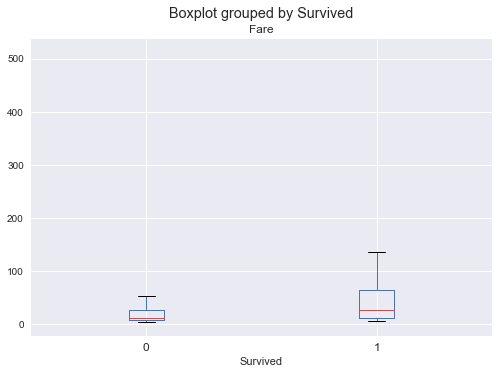

In [23]:
fare_data=pd.DataFrame({"Survived":titanic_data['Survived'],"Fare":titanic_data['Fare']})
fare_data.boxplot(column='Fare',by='Survived',showfliers='False')
plt.show()

上图可以看出，幸存者的平均票价较高，而遇难者的平均票价较低,幸存者的票价差异比遇难者较大

In [24]:
fare_survival=pd.DataFrame({"Survived":titanic_data['Survived'],"Fare":titanic_data['Fare']})
fare_survival.corr()

,Fare,Survived
Fare,1.000000,0.264235
Survived,0.264235,1.000000


从上表可以看出，船票费用和生存率之间呈现正相关关系，并且相关系数较高

## 2.6上船地点和生存率之间的关系

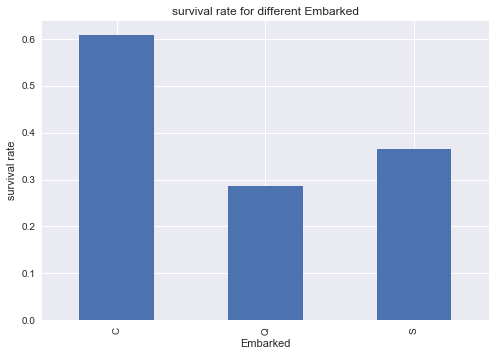

In [25]:
embarked_survival=titanic_data.groupby('Embarked').mean()['Survived']
plt.title("survival rate for different Embarked")
plt.ylabel("survival rate")
embarked_survival.plot(kind='bar')
plt.show()

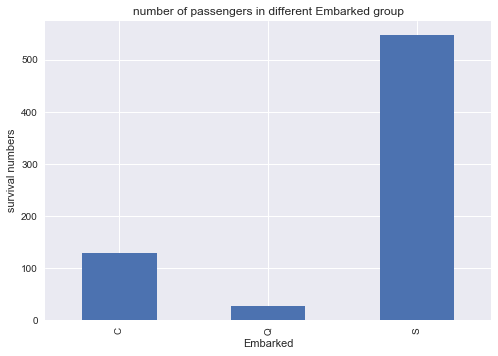

In [26]:
embarked_survival_num=titanic_data.groupby('Embarked').count()['Survived']
plt.title("number of passengers in different Embarked group")
plt.ylabel("survival numbers")
embarked_survival_num.plot(kind='bar')
plt.show()

上图中，可以看出在C地点上船的人生存率最高，S地点其次，Q地点生存率最低

# 3结论与限制：


## 3.1分析结论

| 字段与生存率       | 分析结果           | 相关系数 |可能的推理|
| ------------- |:-------------:| -------:|---------:|
| 年龄与生存率     | 幸存者年龄均值为28岁，遇难者年龄均值为30岁，在0-10岁内生存率最高 | -0.082|年纪较小的人可以先上救生艇，并且年轻的壮年人更容易幸存下来|
|  性别与生存率   | 女性生存率比男性高出0.6个百分点     |   无 | 在救援的时候可能让妇女先上救生艇|
| 船舱等级和生存率| 1等舱生存率>2等舱生存率>3等舱生存率    |    -0.36 |头等舱离救生艇水面较近，逃生相对较容易|
|亲属数量和生存率|有1个亲属的人生存率较高|-0.01|相关系数较小，分析结果相差不大|
|船票价格和生存率|遇难者船票价格均价为23，幸存者均价为52，幸存者的偏角较高|0.26|票价高者可能是头等舱乘客，乘坐位置较好，逃生容易，幸存率高|
|上船地点和生存率|C地点上船的生存率>S地点上船的生存率>Q地点上船的生存率|无|不同地点上船的乘客，集中乘坐在船的某个区域面，该区域面船体受损较小，或者没入水中时间较长，所以生存率较高|
1. 在分析中中，我们发现，船舱等级、票价和生存率之间相关系数较高，生存率和船舱等级、票价可能有相关关系
2. 在titianic上妇女，儿童可能获得了优先逃生的权利，分析显示，妇女和0-10岁的儿童生存率相比男性和其他年龄段的较高
3. 上船位置和生存率之间也有关系，C地点上船的生存率>S地点上船的生存率>Q地点上船的生存率，这可能和不同上船地点在船体乘坐的区域有关系


## 3.2 结论限制

1. 数据样本太小，不能代表总体数据，可能导致分析不准确。
2. 对缺失值的处理可能影响了对生存率的分析。
3. 可能有些变了影响存活率但并没在数据中。
4. 调查数据存在的不准确问题可能影响分析结果